In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2025-04-06 20:50:56--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.134.232, 52.217.199.48, 16.182.73.224, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.134.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  20.0MB/s    in 0.6s    

2025-04-06 20:50:57 (20.0 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [2]:
import os
input_data = os.path.join("jena_climate_2009_2016.csv")

In [3]:
with open(input_data) as f:
    input_data = f.read()

In [4]:
data_records = input_data.split("\n")
title = data_records[0].split(",")
data_records = data_records[1:]
print(title)
print(len(data_records))
import os
input_data = os.path.join("jena_climate_2009_2016.csv")

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [5]:
with open(input_data) as f:
    input_data = f.read()

In [6]:
data_records = input_data.split("\n")
title = data_records[0].split(",")
data_records = data_records[1:]
print(title)
print(len(data_records))
#Handling and interpreting the dataset


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [7]:
import numpy as np
temp = np.zeros((len(data_records),))
original_input_data = np.zeros((len(data_records), len(title) - 1))
for i, line in enumerate(data_records):
    values = [float(x) for x in line.split(",")[1:]]
    temp[i] = values[1]
    original_input_data[i, :] = values[:]
import numpy as np
temp = np.zeros((len(data_records),))
original_input_data = np.zeros((len(data_records), len(title) - 1))
for i, line in enumerate(data_records):
    values = [float(x) for x in line.split(",")[1:]]
    temp[i] = values[1]
    original_input_data[i, :] = values[:]
#Plotting the temperature time series

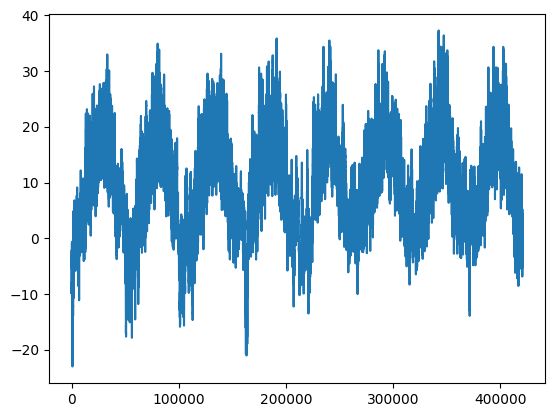

In [8]:
from matplotlib import pyplot as plt
plt.plot(range(len(temp)), temp)
#Plotting the temperature time series for the initial 10 days.

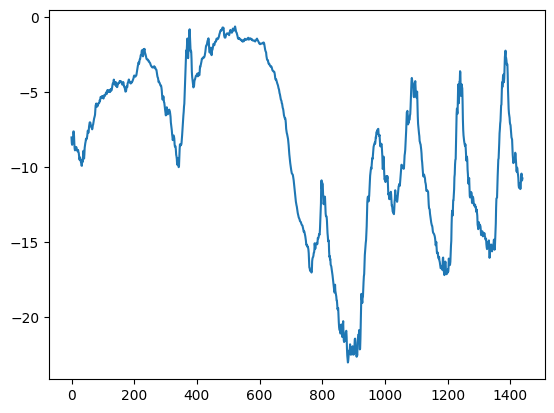

In [9]:
plt.plot(range(1440), temp[:1440])
#Determining the sample count for each data split.

In [10]:
train_Sample_Num = int(0.5 * len(original_input_data))
val_original_input_data = int(0.25 * len(original_input_data))
test_Sample_Number = len(original_input_data) - train_Sample_Num - val_original_input_data
print("train_Sample_Num:", train_Sample_Num)
print("val_original_input_data:", val_original_input_data)
print("test_Sample_Number:", test_Sample_Number)
#Data Preparation
#Scaling the data

train_Sample_Num: 210225
val_original_input_data: 105112
test_Sample_Number: 105114


In [11]:
mean = original_input_data[:train_Sample_Num].mean(axis=0)
original_input_data -= mean
std = original_input_data[:train_Sample_Num].std(axis=0)
original_input_data /= std
import numpy as np
from tensorflow import keras
number_of_series = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=number_of_series[:-3],
    targets=number_of_series[3:],
    sequence_length=3,
    batch_size=2,
)

In [12]:
for input_sequence, targets in dummy_dataset:
    for i in range(input_sequence.shape[0]):
        print([int(x) for x in input_sequence[i]], int(targets[i]))
#Creating datasets for training, validation, and testing.

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [13]:
resample_rate = 6
seq_len = 120
forecast_horizon = resample_rate * (seq_len + 24 - 1)
batch_size = 256

In [14]:
training_dataset = keras.utils.timeseries_dataset_from_array(
    original_input_data[:-forecast_horizon],
    targets=temp[forecast_horizon:],
    sampling_rate=resample_rate,
    sequence_length=seq_len,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=train_Sample_Num)

In [15]:
validation_dataset = keras.utils.timeseries_dataset_from_array(
    original_input_data[:-forecast_horizon],
    targets=temp[forecast_horizon:],
    sampling_rate=resample_rate,
    sequence_length=seq_len,
    shuffle=True,
    batch_size=batch_size,
    start_index=train_Sample_Num,
    end_index=train_Sample_Num + val_original_input_data)

In [16]:
test_dataset = keras.utils.timeseries_dataset_from_array(
    original_input_data[:-forecast_horizon],
    targets=temp[forecast_horizon:],
    sampling_rate=resample_rate,
    sequence_length=seq_len,
    shuffle=True,
    batch_size=batch_size,
    start_index=train_Sample_Num + val_original_input_data)
#Inspecting the contents and quality of one of our datasets.

In [17]:
for samples, targets in training_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break
#Establishing a simple, non-machine-learning baseline
#Calculating the common-sense baseline MAE

samples shape: (256, 120, 14)
targets shape: (256,)


In [18]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

In [19]:
print(f"Validation MAE: {evaluate_naive_method(validation_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")


Validation MAE: 2.44
Test MAE: 2.62


In [20]:
!pip install tensorflow==2.12

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.6 MB/s eta 0:00:00
  At

In [19]:
#!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_sequence = keras.Input(shape=(seq_len, original_input_data.shape[-1]))
x = layers.Flatten()(input_sequence)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(input_sequence, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(training_dataset,
                    epochs=10,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")
#Plotting the results

Epoch 1/10
819/819 [==============================] - 41s 50ms/step - loss: 12.9411 - mae: 2.7845 - val_loss: 9.9679 - val_mae: 2.4825
Epoch 2/10
819/819 [==============================] - 40s 49ms/step - loss: 8.5806 - mae: 2.3000 - val_loss: 9.7218 - val_mae: 2.4465
Epoch 3/10
819/819 [==============================] - 40s 49ms/step - loss: 7.4567 - mae: 2.1461 - val_loss: 12.5211 - val_mae: 2.7921
Epoch 4/10
819/819 [==============================] - 39s 48ms/step - loss: 6.7179 - mae: 2.0394 - val_loss: 14.5891 - val_mae: 3.0392
Epoch 5/10
819/819 [==============================] - 40s 48ms/step - loss: 6.1964 - mae: 1.9590 - val_loss: 12.2066 - val_mae: 2.7536
Epoch 6/10
819/819 [==============================] - 41s 49ms/step - loss: 5.7521 - mae: 1.8876 - val_loss: 14.6493 - val_mae: 3.0245
Epoch 7/10
819/819 [==============================] - 40s 48ms/step - loss: 5.3997 - mae: 1.8271 - val_loss: 11.5340 - val_mae: 2.6726
Epoch 8/10
819/819 [==============================] - 40

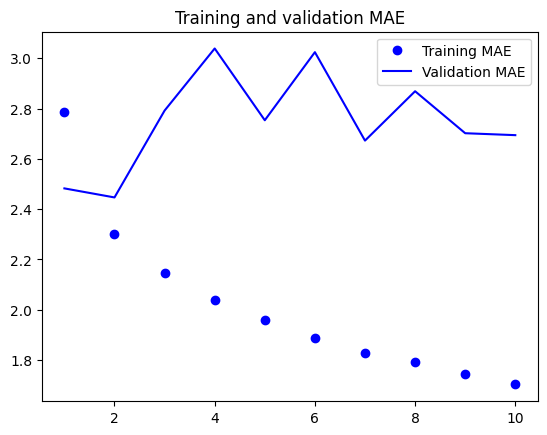

In [20]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()
#Let's try a 1D convolutional model
input_sequence = keras.Input(shape=(seq_len, original_input_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(input_sequence)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(input_sequence, outputs)

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(training_dataset,
                    epochs=10,
                    validation_data=validation_dataset,
                    callbacks=callbacks)


Epoch 1/10
819/819 [==============================] - 74s 90ms/step - loss: 22.4213 - mae: 3.6987 - val_loss: 15.0283 - val_mae: 3.0712
Epoch 2/10
819/819 [==============================] - 72s 87ms/step - loss: 15.6346 - mae: 3.1391 - val_loss: 15.7515 - val_mae: 3.1269
Epoch 3/10
819/819 [==============================] - 74s 90ms/step - loss: 14.1954 - mae: 2.9883 - val_loss: 16.0253 - val_mae: 3.1784
Epoch 4/10
819/819 [==============================] - 70s 86ms/step - loss: 13.2898 - mae: 2.8888 - val_loss: 15.7244 - val_mae: 3.1353
Epoch 5/10
819/819 [==============================] - 70s 86ms/step - loss: 12.5617 - mae: 2.8033 - val_loss: 19.0051 - val_mae: 3.4566
Epoch 6/10
819/819 [==============================] - 73s 89ms/step - loss: 12.0608 - mae: 2.7462 - val_loss: 15.9391 - val_mae: 3.1481
Epoch 7/10
819/819 [==============================] - 75s 91ms/step - loss: 11.6750 - mae: 2.7008 - val_loss: 14.0282 - val_mae: 2.9327
Epoch 8/10
819/819 [============================

In [22]:
model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")
#Setting up an initial recurrent model as a baseline
#A basic LSTM-based model

405/405 [==============================] - 17s 42ms/step - loss: 14.8875 - mae: 3.0596
Test MAE: 3.06


In [24]:
input_sequence = keras.Input(shape=(seq_len, original_input_data.shape[-1]))
x = layers.LSTM(16)(input_sequence)
outputs = layers.Dense(1)(x)
model = keras.Model(input_sequence, outputs)

In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(training_dataset,
                    epochs=10,
                    validation_data=validation_dataset,
                    callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 97s 114ms/step - loss: 40.5929 - mae: 4.6170 - val_loss: 13.2996 - val_mae: 2.7534
Epoch 2/10
819/819 [==============================] - 95s 116ms/step - loss: 11.1102 - mae: 2.5998 - val_loss: 9.6430 - val_mae: 2.4144
Epoch 3/10
819/819 [==============================] - 93s 113ms/step - loss: 9.9528 - mae: 2.4708 - val_loss: 9.5474 - val_mae: 2.3990
Epoch 4/10
819/819 [==============================] - 95s 116ms/step - loss: 9.5048 - mae: 2.4079 - val_loss: 9.4277 - val_mae: 2.3861
Epoch 5/10
819/819 [==============================] - 92s 111ms/step - loss: 9.1973 - mae: 2.3623 - val_loss: 9.5526 - val_mae: 2.3956
Epoch 6/10
819/819 [==============================] - 92s 112ms/step - loss: 8.8806 - mae: 2.3243 - val_loss: 9.4453 - val_mae: 2.3872
Epoch 7/10
819/819 [==============================] - 113s 138ms/step - loss: 8.5475 - mae: 2.2799 - val_loss: 9.8424 - val_mae: 2.4427
Epoch 8/10
819/819 [==============================]

In [26]:
model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")
#Exploring recurrent neural networks
#NumPy implementation of a basic RNN

405/405 [==============================] - 23s 55ms/step - loss: 10.8176 - mae: 2.5720
Test MAE: 2.57


In [27]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
input_sequence = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in input_sequence:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0)


In [28]:
total_input_features = 14
input_sequence = keras.Input(shape=(None, total_input_features))
outputs = layers.SimpleRNN(16)(input_sequence)


In [29]:
total_input_features = 14
steps = 120
input_sequence = keras.Input(shape=(steps, total_input_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(input_sequence)
print(outputs.shape)


(None, 16)


In [30]:
total_input_features = 14
steps = 120
input_sequence = keras.Input(shape=(steps, total_input_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(input_sequence)
print(outputs.shape)


(None, 120, 16)


In [31]:
input_sequence = keras.Input(shape=(steps, total_input_features))
x = layers.SimpleRNN(16, return_sequences=True)(input_sequence)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)
#Delving into advanced techniques with recurrent neural networks
#Implementing recurrent dropout to reduce overfitting
#Training and evaluating an LSTM model with dropout regularization

In [32]:
input_sequence = keras.Input(shape=(seq_len, original_input_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(input_sequence)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(input_sequence, outputs)

In [33]:
callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(training_dataset,
                    epochs=10,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
input_sequence = keras.Input(shape=(seq_len, total_input_features))
x = layers.LSTM(32, recurrent_dropout=0.2, unroll=True)(input_sequence)

Epoch 1/10
819/819 [==============================] - 198s 238ms/step - loss: 31.7879 - mae: 4.1215 - val_loss: 9.9875 - val_mae: 2.4685
Epoch 2/10
819/819 [==============================] - 190s 232ms/step - loss: 14.9627 - mae: 3.0127 - val_loss: 9.3159 - val_mae: 2.3767
Epoch 3/10
819/819 [==============================] - 192s 234ms/step - loss: 14.0260 - mae: 2.9068 - val_loss: 9.2858 - val_mae: 2.3672
Epoch 4/10
819/819 [==============================] - 193s 235ms/step - loss: 13.3587 - mae: 2.8376 - val_loss: 9.1758 - val_mae: 2.3564
Epoch 5/10
819/819 [==============================] - 192s 234ms/step - loss: 12.7564 - mae: 2.7726 - val_loss: 9.5594 - val_mae: 2.4133
Epoch 6/10
819/819 [==============================] - 190s 232ms/step - loss: 12.3837 - mae: 2.7342 - val_loss: 9.2558 - val_mae: 2.3766
Epoch 7/10
819/819 [==============================] - 188s 230ms/step - loss: 11.9981 - mae: 2.6930 - val_loss: 9.5601 - val_mae: 2.4112
Epoch 8/10
819/819 [=====================

In [35]:
input_sequence = keras.Input(shape=(seq_len, original_input_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(input_sequence)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(input_sequence, outputs)